<a href="https://colab.research.google.com/github/Roy10656/scikit-learn_sample_projects/blob/main/digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

In [46]:
# Using scikit-learn (model, preprocessing, accuracy)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [47]:
# Using Scikit-learn dataset (iris)
from sklearn.datasets import load_digits

In [48]:
# Using Scikit-learn's Support Vector Machine (SVM)
from sklearn.svm import SVC

In [49]:
import matplotlib.pyplot as plt
import cv2

In [50]:
def preprocess_for_digits(img):
    # Threshold
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Make square
    h, w = img.shape
    size = max(h, w)
    square = np.full((size, size), 255, dtype=np.uint8)
    square[(size - h)//2:(size - h)//2 + h,
           (size - w)//2:(size - w)//2 + w] = img

    # Resize to 8×8
    resized = cv2.resize(square, (8, 8), interpolation=cv2.INTER_AREA)

    # Invert (white digit on black → match sklearn)
    inverted = 255 - resized

    # Convert to 0–16
    normalized = (inverted / 255.0) * 16
    return normalized


In [51]:
# Load digits Dataset
digits = load_digits()

In [52]:
# Features (data) and Labels (targets)
# Preprocess ALL digits images
processed_images = []

for img in digits.images:       # 8×8
    img_uint8 = (img / 16 * 255).astype(np.uint8)  # convert to real grayscale
    proc = preprocess_for_digits(img_uint8)
    processed_images.append(proc.flatten())

x = np.array(processed_images)
y = digits.target # Target labels (species)

In [53]:
# Split data into training and testing (80% training and 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42
)

In [54]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
param_grid = {
    'svc__C' : [0.1, 1, 10, 100],
    'svc__gamma' : [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)


print("Best Parameters : ", grid.best_params_)
print("Best cross-validation score : ", grid.best_score_)

Best Parameters :  {'svc__C': 10, 'svc__gamma': 0.01}
Best cross-validation score :  0.9540698799845142


In [55]:
# Make predictions
y_pred = grid.predict(x_test)

In [56]:
# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy * 100:.2f}%")


Accuracy : 97.22%


In [57]:
# from google.colab import files
# uploaded = files.upload()

In [58]:
import os
os.listdir()

['.config',
 'digit_2_12.png',
 'digit_5_15.png',
 'digit_6_16.png',
 'digit_1_11.png',
 'digit_9_19.png',
 'digit_4_14.png',
 'digit_3_13.png',
 'digit_8_18.png',
 'digit_7_17.png',
 'digit_0_10.png',
 'sample_data']

In [59]:
image_path = "./digit_2_12.png"

print(os.path.abspath(image_path))

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    # Load in grayscale
if image is None:
    print("Image not found or unable to read!")
    exit()



/content/digit_2_12.png


In [60]:
# Normalize to 0-16 like scikit-learn
preprocessed = preprocess_for_digits(image)

In [61]:
# Flatten
flattened = preprocessed.flatten().reshape(1, -1)

In [62]:
prediction = grid.predict(flattened)

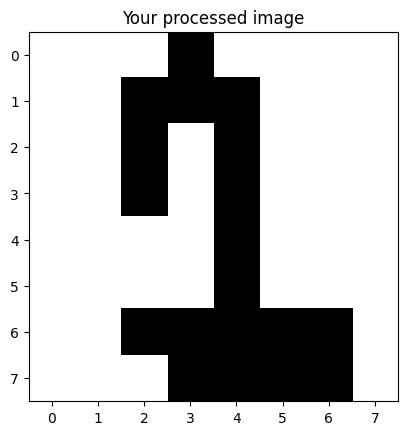

In [63]:
# plt.imshow(digits.images[12], cmap="gray")
# plt.title("Original dataset image")
# plt.show()

plt.imshow(preprocessed, cmap="gray")
plt.title("Your processed image")
plt.show()

In [64]:
print("Flattened image shape : ", flattened.shape)
print("Prediction Complete")
print(f"Predicted result : {prediction[0]}")

Flattened image shape :  (1, 64)
Prediction Complete
Predicted result : 2
